--- Websites ---


,domain
0,bostonzen.org
1,mazautoglass.com
2,melatee.com
3,timent.com
4,tlalocrivas.com


--- Companies ---


,domain,company_commercial_name,company_legal_name,company_all_available_names
0,bostonzen.org,Greater Boston Zen Center,GREATER BOSTON ZEN CENTER INC.,Greater Boston Zen Center | Boston Zen | GREAT...
1,mazautoglass.com,MAZ Auto Glass,NaN,MAZ Auto Glass
2,melatee.com,Melatee,NaN,Melatee
3,timent.com,Timent Technologies,NaN,Timent Technologies | Timent
4,tlalocrivas.com,Tlaloc Rivas,NaN,Tlaloc Rivas


--- Inputs ---


,input name,input phone,input website,input_facebook
0,Acorn Law P.C.,NaN,https://https//acornlawpc.com/,https://www.facebook.com/acornfurnitureworkshops
1,Advance Net Support,(786) 426-3492,NaN,NaN
2,Aroostook,207.762.9321,NaN,NaN
3,&AWL,NaN,awlsnap.com,NaN
4,RyanLBatesDDS,(509) 276-6996,google.com,NaN



--- Missing values in sample-websites.csv (997 rows) ---


,Column,Missing Values,Missing %
0,domain,0,0.0



--- Missing values in sample-websites-company-names.csv (997 rows) ---


,Column,Missing Values,Missing %
0,domain,0,0.00
1,company_commercial_name,0,0.00
2,company_legal_name,708,71.01
3,company_all_available_names,0,0.00



--- Missing values in API-input-sample.csv (32 rows) ---


,Column,Missing Values,Missing %
0,input name,0,0.00
1,input phone,19,59.38
2,input website,11,34.38
3,input_facebook,22,68.75



--- Column overview ---
Companies: ['domain', 'company_commercial_name', 'company_legal_name', 'company_all_available_names']
Websites: ['domain']

Total rows after merge: 997


,domain,company_commercial_name,company_legal_name,company_all_available_names
0,bostonzen.org,Greater Boston Zen Center,GREATER BOSTON ZEN CENTER INC.,Greater Boston Zen Center | Boston Zen | GREAT...
1,mazautoglass.com,MAZ Auto Glass,NaN,MAZ Auto Glass
2,melatee.com,Melatee,NaN,Melatee
3,timent.com,Timent Technologies,NaN,Timent Technologies | Timent
4,tlalocrivas.com,Tlaloc Rivas,NaN,Tlaloc Rivas



--- Column overview ---
Inputs: ['input name', 'input phone', 'input website', 'input_facebook']
Merged: ['domain', 'company_commercial_name', 'company_legal_name', 'company_all_available_names']
Match rate by commercial name: 9.38%
Match rate by domain (website): 18.75%

--- Exemple match dupa nume ---


,input name,input phone,input website,input_facebook,domain,company_commercial_name,company_legal_name,company_all_available_names,_merge
0,Acorn Law P.C.,NaN,https://https//acornlawpc.com/,https://www.facebook.com/acornfurnitureworkshops,acornlawpc.com,Acorn Law P.C.,Acorn Law P.C.,Acorn Law P.C. | Acorn Law | Acorn Law P,both
1,Advance Net Support,(786) 426-3492,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,Aroostook,207.762.9321,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,&AWL,NaN,awlsnap.com,NaN,NaN,NaN,NaN,NaN,left_only
4,RyanLBatesDDS,(509) 276-6996,google.com,NaN,NaN,NaN,NaN,NaN,left_only



--- Exemple match dupa domeniu ---


,input name,input phone,input website,input_facebook,domain,company_commercial_name,company_legal_name,company_all_available_names,_merge
0,Acorn Law P.C.,NaN,https://https//acornlawpc.com/,https://www.facebook.com/acornfurnitureworkshops,NaN,NaN,NaN,NaN,left_only
1,Advance Net Support,(786) 426-3492,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,Aroostook,207.762.9321,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,&AWL,NaN,awlsnap.com,NaN,awlsnap.com,Awl Snap Leather Goods,Awl Snap LLC.,Awl Snap Leather Goods | Awl Snap | Awl Snap LLC.,both
4,RyanLBatesDDS,(509) 276-6996,google.com,NaN,NaN,NaN,NaN,NaN,left_only


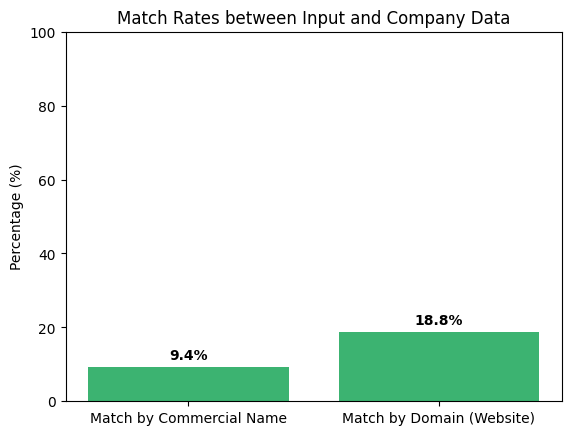


--- Summary Report ---
Total companies in dataset: 997
Match rate by commercial name: 9.4%
Match rate by domain (website): 18.8%

Observations:
- Some companies may have missing domains or inconsistent name formats.
- Combining name and domain improves accuracy.

✅ Summary report saved as 'summary_report.csv'


In [4]:
### 1.Citire csv-uri ###

import pandas as pd
from IPython.display import display

# Load CSV files #
websites = pd.read_csv("sample-websites.csv")
companies = pd.read_csv("sample-websites-company-names.csv")
inputs = pd.read_csv("API-input-sample.csv")

# Preview data #
print("--- Websites ---")
display(websites.head())

print("--- Companies ---")
display(companies.head())

print("--- Inputs ---")
display(inputs.head())


### 2.Analizare lipsuri din fisierele csv ###

def missing_report(df, name):
    """Generate a summary of missing values for each dataset."""
    missing_summary = df.isnull().sum().reset_index()
    missing_summary.columns = ["Column", "Missing Values"]
    missing_summary["Missing %"] = (missing_summary["Missing Values"] / len(df) * 100).round(2)
    print(f"\n--- Missing values in {name} ({len(df)} rows) ---")
    display(missing_summary)

# Rapoarte #
missing_report(websites, "sample-websites.csv")
missing_report(companies, "sample-websites-company-names.csv")
missing_report(inputs, "API-input-sample.csv")


### 3.Merge (Join) intre fisierele companiilor si site-urilor ###

print("\n--- Column overview ---")
print("Companies:", companies.columns.tolist())
print("Websites:", websites.columns.tolist())

# Unim pe coloana comuna (probabil 'domain') #
merged = pd.merge(companies, websites, on="domain", how="left")

print(f"\nTotal rows after merge: {len(merged)}")
display(merged.head())


### 4.Matching simplu ###

print("\n--- Column overview ---")
print("Inputs:", inputs.columns.tolist())
print("Merged:", merged.columns.tolist())

# Match exact dupa numele comercial (company_commercial_name) #
matched_by_commercial = inputs.merge(
    merged, left_on="input name", right_on="company_commercial_name", how="left", indicator=True
)

# Match dupa domeniu (website) #
matched_by_domain = inputs.merge(
    merged, left_on="input website", right_on="domain", how="left", indicator=True
)

# Procent de match #
commercial_match_rate = (matched_by_commercial["_merge"] == "both").mean() * 100
domain_match_rate = (matched_by_domain["_merge"] == "both").mean() * 100

print(f"Match rate by commercial name: {commercial_match_rate:.2f}%")
print(f"Match rate by domain (website): {domain_match_rate:.2f}%")

# Afisam primele randuri de match #
print("\n--- Exemple match dupa nume ---")
display(matched_by_commercial.head())

print("\n--- Exemple match dupa domeniu ---")
display(matched_by_domain.head())


#### 5.Analiza numerica si grafica ###

import matplotlib.pyplot as plt

metrics = pd.DataFrame({
    "Metric": ["Match by Commercial Name", "Match by Domain (Website)"],
    "Percentage": [commercial_match_rate, domain_match_rate]
})

plt.bar(metrics["Metric"], metrics["Percentage"], color="mediumseagreen")
plt.title("Match Rates between Input and Company Data")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

# Afișează valorile peste bare #
for i, v in enumerate(metrics["Percentage"]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')

plt.show()


### 6.Raport final ###

print("\n--- Summary Report ---")
print(f"Total companies in dataset: {len(companies)}")
print(f"Match rate by commercial name: {commercial_match_rate:.1f}%")
print(f"Match rate by domain (website): {domain_match_rate:.1f}%")

print("\nObservations:")
print("- Some companies may have missing domains or inconsistent name formats.")
print("- Combining name and domain improves accuracy.")


## Optional: Save summary ##
summary = pd.DataFrame({
    "total_companies": [len(companies)],
    "commercial_match_rate": [commercial_match_rate],
    "domain_match_rate": [domain_match_rate]
})
summary.to_csv("summary_report.csv", index=False)
print("\n✅ Summary report saved as 'summary_report.csv'")
